In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

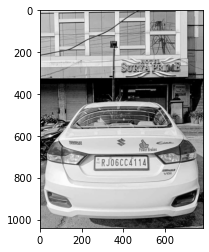

In [2]:
img =cv2.imread('car.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

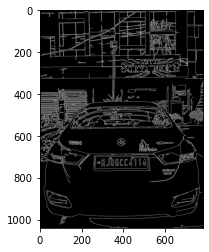

In [3]:
bfilter = cv2.bilateralFilter(gray,40,40,40) # Noise Reduction
edged = cv2.Canny(bfilter,40,200) # Edge Detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse=True)[0:30]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location

array([[[256, 701]],

       [[261, 767]],

       [[518, 762]],

       [[509, 692]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

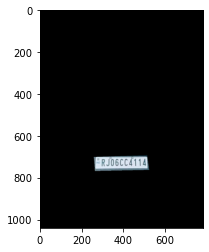

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image= gray[x1:x2+1,y1:y2+1]

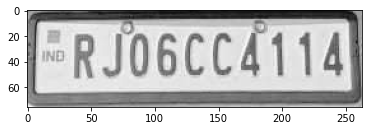

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

<h1>USE OCR to READ NUMBER PLATE</h1>

In [12]:
reader = easyocr.Reader(['en'])
results = reader.readtext(cropped_image)
results

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\LENOVO\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[25, 4], [256, 4], [256, 61], [25, 61]], 'RJO6cC411A', 0.37554549412386795)]

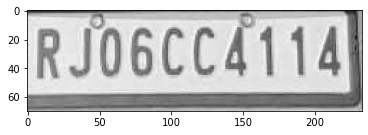

In [13]:
crop_image = cropped_image[6:82,30:410]
plt.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))

In [14]:
text = results[0][1].upper()

In [15]:
text

'RJO6CC411A'